# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Данные содержат и пропуски, и выбросы. Поэтапно будем рассматривать каждый столбец.

### Шаг 2. Предобработка данных

In [4]:
df.rename(columns={'rooms': 'rooms_total', 'balcony': 'balcony_total', 'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'}, inplace=True)

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms_total', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony_total',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Рассмотрим столбец с названием населенного пункта `locality_name`.

In [6]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Переведем все символы в нижний регистр, также заменим букву `е` на `ё`.

In [7]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [8]:
df['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Заметил, что в данных есть `городской поселок советский` и `поселок городского типа советский`. Возможно, что это один и тот же населенный пункт, хотя может быть и разный. Оставим без изменений.

In [9]:
df.duplicated().sum()

0

Дубликатов нет. 

#### Цена на момент снятия с публикации - столбец  `last_price`

Округлим цену `last_price` до целых, изменим тип данных на `int`, т.к. копейки нам не важны.

In [10]:
df['last_price'] = df['last_price'].astype(int)

#### Изменим тип столбца `first_day_exposition` и уберем время, оставив только дату. Время нам также неинтересно.

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT%H:%M:%S')
df['first_day_exposition'].head(2)

0   2019-03-07
1   2018-12-04
Name: first_day_exposition, dtype: datetime64[ns]

#### Столбец `is_apartment` - изменим тип на `bool`. Столбец `balcony_total` - изменим тип на `int`. Пропуски заменим нулями, т.к. скорее всего их не указали по причине их отсутствия.

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(0).astype(bool)

In [13]:
df['balcony_total'] = df['balcony_total'].fillna(0).astype(int)

#### Если квартира имеет свободную планировку, то зададим для нее `количество комнат = 0`.

In [14]:
df['rooms_total'].loc[df['open_plan'] == 1].value_counts()

0    59
1     3
3     2
5     1
4     1
2     1
Name: rooms_total, dtype: int64

In [15]:
df['rooms_total'].loc[df['open_plan'] == 1] = 0

In [16]:
df['rooms_total'].loc[df['open_plan'] == 1].value_counts()

0    67
Name: rooms_total, dtype: int64

Посмотрим, что осталось с пропусками в таблице.

In [17]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms_total                 0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony_total               0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Строки, где не указан город, смело удаляем, т.к. такое объявление для анализа бессмысленно. Странно, что существует возможность разместить объявление, не указав населенный пункт. Возможно, данные потеряны после экспорта.

In [18]:
df = df.dropna(subset=['locality_name'])
df.reset_index()
df.shape

(23650, 22)

Рассмотрим данные о высоте потолков. По СНИПам и технике безопасности не разрешаются потолки ниже 2.5 метров в помещениях для проживания.

In [19]:
df[(df['ceiling_height'] < 2.5)]

,total_images,last_price,total_area,first_day_exposition,rooms_total,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_total,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
193,6,7920000,83.8,2017-08-17,4,2.47,9.0,55.9,9,False,...,9.8,1,санкт-петербург,30352.0,7724.0,0.0,NaN,1.0,289.0,155.0
227,13,2200000,47.0,2018-01-12,3,2.34,5.0,NaN,1,False,...,NaN,0,поселок новый свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
552,11,2999000,33.5,2017-03-30,1,2.00,15.0,17.5,6,False,...,6.5,0,санкт-петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
632,20,3350000,35.0,2017-11-14,2,2.45,9.0,21.0,9,False,...,6.0,2,поселок городского типа кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,12,7100000,65.5,2016-03-30,4,2.46,5.0,51.0,4,False,...,9.4,0,санкт-петербург,24542.0,5110.0,1.0,572.0,0.0,NaN,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22590,16,6000000,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,...,10.0,0,санкт-петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
22960,17,2300000,53.6,2018-10-18,2,2.00,2.0,19.0,1,False,...,10.0,0,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23121,20,4290000,35.2,2018-09-12,1,2.47,14.0,20.0,7,False,...,7.8,1,санкт-петербург,7900.0,13142.0,1.0,506.0,0.0,NaN,41.0
23496,7,3300000,55.3,2018-06-19,2,2.45,14.0,31.0,2,False,...,8.4,3,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,62.0


In [20]:
df['locality_name'][df['ceiling_height'].isnull()].value_counts()

санкт-петербург       5617
поселок мурино         342
поселок шушары         223
поселок парголово      190
деревня кудрово        177
                      ... 
деревня калитино         1
деревня тарасово         1
поселок белоостров       1
поселок тесово-4         1
поселок совхозный        1
Name: locality_name, Length: 264, dtype: int64

In [21]:
df.groupby(['locality_name','floors_total'])['ceiling_height'].median()

locality_name  floors_total
бокситогорск   3.0             5.00
               4.0             2.80
               5.0              NaN
волосово       1.0              NaN
               2.0              NaN
                               ... 
шлиссельбург   4.0             2.50
               5.0             2.50
               9.0             2.60
               15.0             NaN
               16.0            2.85
Name: ceiling_height, Length: 1066, dtype: float64

Строк с потолками ниже 2.5м всего `73`. Значения, которые немного ниже 2.5 метров, возможно появились, т.к. люди указали фактическую высоту до потолка после ремонта (обнижения). В строках, где значение высоты потолка `1м` похоже на бездумное проставление, чтобы система пропустила объявление к публикации.
Логики при замене пропусков на какие-то средние значения по региону, высотности строения и т.д. не вижу. На выходе получим еще более зашумленные данные.
Можно заменить все эти значения и пропуски на СНИПовские, т.к. не должно быть меньше 2.5 метров потолок. Однако это вызовет резкий перекос в значении `2.5 метра`, мы сами испортим входные данные. Поэтому оставим все, как есть. Тем более с `NaN` pandas выполняет арифметические операции.


In [22]:
df['floors_total'].value_counts().sort_values()

34.0       1
29.0       1
60.0       1
37.0       1
52.0       1
33.0       1
36.0       3
28.0      21
35.0      24
1.0       25
26.0     124
21.0     158
27.0     164
11.0     202
13.0     229
20.0     271
22.0     286
19.0     339
23.0     349
15.0     365
2.0      381
8.0      388
24.0     462
18.0     505
14.0     553
7.0      589
3.0      667
17.0     833
6.0      910
25.0    1075
10.0    1174
4.0     1193
12.0    1361
16.0    1375
9.0     3758
5.0     5775
Name: floors_total, dtype: int64

С этажами ничего не поделать, т.к. не зная истинного этажа на другой его не заменить. Добавим только столбец `floor_category` с категорией этажа. Введем следующие категории для этажей: 
- первый
- последний
- другой

In [23]:
df['floor_category'] = df['floor']
df['floor_category'].loc[df['floor_category'] == 1] = 'первый'
df['floor_category'].loc[df['floor_category'] == df['floors_total']] = 'последний'
df['floor_category'].loc[(df['floor_category'] != 'первый') & (df['floor_category'] != 'последний')] = 'другой'
df['floor_category'].value_counts()

другой       17408
последний     3330
первый        2912
Name: floor_category, dtype: int64

In [24]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms_total                 0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony_total               0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around_3000        5510
parks_nearest           15586
ponds_around_3000        5510
ponds_nearest           14565
days_exposition          3180
floor_category              0
dtype: int64

### Вывод
После всех манипуляций данные все равно остались с "мусором", но заменять их на усредненные нет смысла. Хорошо было бы, если значения в колонки `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000` `ponds_nearest` подгружались автоматически в зависимости от координат недвижимости, все же пруды, парки и аэропорты быстро и часто не строятся.
Параметры жилой площади и кухни люди часто не вводят, т.к. точно не знают сами и/или считают этот параметр непервостепенным. Также недвижимость может представлять из себя малосемейку, общежитие, где кухня и санузел общие, что также оказывает влияние на чистоту данных.
Оставляем данные в таком виде для дальнейшего анализа.

### Шаг 3. Посчитайте и добавьте в таблицу

Добавим в таблицу колонки:
- цена за метр `price_for_meter`
- соотношение жилой площади к общей `ratio_living_total_area`
- соотношение площади кухни к общей `ratio_kitchen_total_area`

In [25]:
df['price_for_meter'] = (df['last_price'] / df['total_area']).astype(int)
df['ratio_living_total_area'] = df['living_area'] / df['total_area']
df['ratio_kitchen_total_area'] = df['kitchen_area'] / df['total_area']

Добавим в таблицу колонки:
- день размещения объявления `day_of_week`
- месяц размещения объявления `month_of_year`
- год размещения объявления `year_exposition`

In [26]:
df['day_of_week'] = df['first_day_exposition'].dt.weekday
df['month_of_year'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [27]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms_total,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,floor_category,price_for_meter,ratio_living_total_area,ratio_kitchen_total_area,day_of_week,month_of_year,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,другой,120370,0.472222,0.231481,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,первый,82920,0.460396,0.272277,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,другой,92785,0.612500,0.148214,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,другой,408176,NaN,NaN,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,другой,100000,0.320000,0.410000,1,6,2018


Напишем фукнцию для построения гистрограмм `hist_plot`.

In [28]:
def hist_plot(df, column, title, xlabel, ylabel,bins, range_x):    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    df[column].hist(bins = bins, range = range_x)
    plt.show()
    print('Мода данного распределения = ', df[column].mode()[0].round(2))

Построим гистограмму общей площади продаваемой недвижимости.

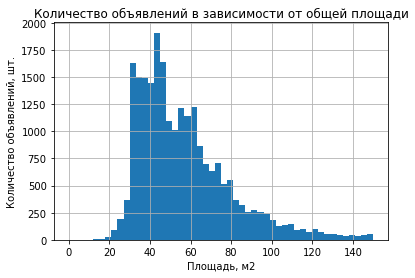

Мода данного распределения =  45.0


In [29]:
hist_plot(
    df,
    'total_area',
    'Количество объявлений в зависимости от общей площади',
    'Площадь, м2',
    'Количество объявлений, шт.',
    50,
    (0,150))

Чаще других представлена площать в 45 квадратов. Есть предположение, что в эту категорию попадают 1-комнатные новостройки, а также старые 2-комнатные квартиры. Также застройщикам удобно строить такие площади, которые удовлетворяют разным нормативам, а цена остается доступной для реализации.

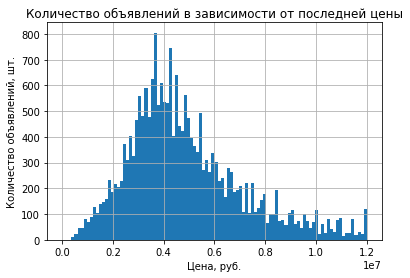

Мода данного распределения =  4500000


In [30]:
hist_plot(
    df,
    'last_price',
    'Количество объявлений в зависимости от последней цены',
    'Цена, руб.',
    'Количество объявлений, шт.',
    100,
    (0, 12*10**6)
)

От  3.5 млн. рублей  до 5млн. рублей предложений намного больше, мода - 4.5 млн. Таким образом, самое ходовое жилье (предположу, что это те, которые 45 квадратов) стоят в районе 4.5 млн. рублей с ремонтом или без. Итого около 100 т.р. за 1 м2.

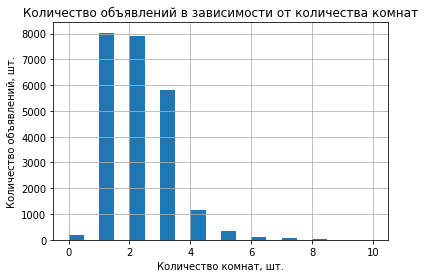

Мода данного распределения =  1


In [31]:
hist_plot(
    df,
    'rooms_total',
    'Количество объявлений в зависимости от количества комнат',
    'Количество комнат, шт.',
    'Количество объявлений, шт.',
    20,
    (0, 10)
)

Наиболее часто представлены в продаже 1-комнатные, 2- комнатные, немного реже 3- комнатные квартиры. На мой взгляд, это классическая гистограмма.

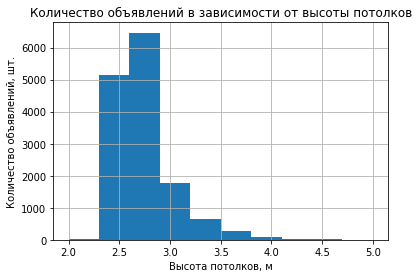

Мода данного распределения =  2.5


In [32]:
hist_plot(
    df,
    'ceiling_height',
    'Количество объявлений в зависимости от высоты потолков',
    'Высота потолков, м',
    'Количество объявлений, шт.',
    10,
    (2, 5)
)

Потолки, как и положено по СНИПу имеют высоту 2.5 метра. Реально строят немного выше 2.65-2,85 метра, чтобы после чистовой отделки выйти на 2.5 метра. Да и это первое значение, которое приходит "на ум" при публикации объявления.

Выводы: 

- чаще других представлена площать в 45 квадратов. Есть предположение, что в эту категорию попадают 1-комнатные новостройки, а также старые 2-комнатные квартиры. Также застройщикам удобно строить такие площади, которые удовлетворяют разным нормативам, а цена остается доступной для реализации.
- От  3.5 млн. рублей  до 5млн. рублей предложений намного больше, мода - 4.5 млн. Таким образом, самое ходовое жилье (предположу, что это те, которые 45 квадратов) стоят в районе 4.5 млн. рублей с ремонтом или без. Итого около 100 т.р. за 1 м2.
- Наиболее часто представлены в продаже 1-комнатные, 2- комнатные, немного реже 3- комнатные квартиры. На мой взгляд, это классическая гистограмма.
- Потолки, как и положено по СНИПу имеют высоту 2.5 метра. Реально строят немного выше 2.65-2,85 метра, чтобы после чистовой отделки выйти на 2.5 метра. Да и это первое значение, которое приходит "на ум" при публикации объявления. 

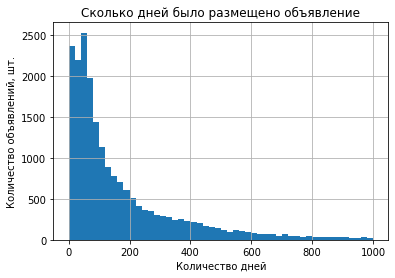

Мода данного распределения =  45.0


In [33]:
hist_plot(
    df,
    'days_exposition',
    'Сколько дней было размещено объявление',
    'Количество дней',
    'Количество объявлений, шт.',
    50,
    (0, 1000)
)

То, что объявлений с большими сроками размещения остается все меньше и меньше очевидно, а вот то, что 45 дней чаще всего висит объявление до закрытия - интересный факт. Предположу, что при первичной подаче объявления собственники завышают цену, а спустя полтора месяца снижают ее, оценив более реальную картину спроса и предложения на рынке. Также могут оказывать влияние на продажу через месяц - покупка новой недвижимости, срок одобренного кредита и т.д.
Очень долгое время размещения может быть вызвано с тем, что его просто не закрыли, или продается неликвид.
Из boxplot видно, что средняя продажа - это около 90 дней, т.е. 3 месяца, что похоже на правду, если не демпинговать ценой и т.д.

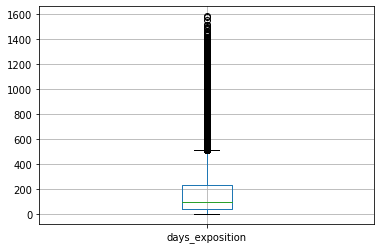

In [34]:
df.boxplot('days_exposition')

In [35]:
df[df['days_exposition']>500]

,total_images,last_price,total_area,first_day_exposition,rooms_total,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,floor_category,price_for_meter,ratio_living_total_area,ratio_kitchen_total_area,day_of_week,month_of_year,year_exposition
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,другой,92785,0.612500,0.148214,3,8,2015
17,6,4180000,36.00,2016-09-09,1,NaN,17.0,16.5,7,False,...,1.0,859.0,571.0,другой,116111,0.458333,0.305556,4,9,2016
23,11,2950000,32.00,2016-10-29,1,2.60,9.0,17.7,9,False,...,1.0,190.0,615.0,последний,92187,0.553125,0.190625,5,10,2016
35,6,15500000,149.00,2017-06-26,5,NaN,5.0,104.0,4,False,...,1.0,779.0,644.0,другой,104026,0.697987,0.114094,0,6,2017
42,13,22000000,161.80,2015-07-08,4,2.80,4.0,80.9,2,False,...,1.0,907.0,987.0,другой,135970,0.500000,0.108776,2,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9000000,110.00,2015-12-10,4,3.36,7.0,64.6,5,False,...,1.0,118.0,816.0,другой,81818,0.587273,0.143636,3,12,2015
23672,5,3000000,30.80,2016-06-08,1,NaN,5.0,16.1,3,False,...,0.0,NaN,808.0,другой,97402,0.522727,0.204545,2,6,2016
23675,8,3550000,39.50,2016-10-03,1,NaN,16.0,19.0,13,False,...,0.0,NaN,721.0,другой,89873,0.481013,0.215190,0,10,2016
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,1.0,806.0,519.0,другой,129903,0.552812,0.145405,3,10,2016


Очень много выбросов после 500 дней публикации, отсортируем их дальше, написав функцию для очистки данных по столбцу.

In [36]:
def operating_values(df, column):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    column_cleanest = df.loc[(df[column] > (q1 - 1.5*iqr)) & (df[column] < (q3 + 1.5*iqr))]
    return column_cleanest

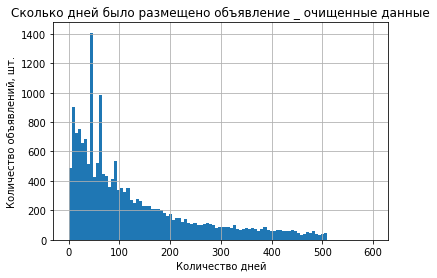

Мода данного распределения =  45.0


In [37]:
hist_plot(
    operating_values(df, 'days_exposition'),
    'days_exposition',
    'Сколько дней было размещено объявление _ очищенные данные',
    'Количество дней',
    'Количество объявлений, шт.',
    100,
    (0, 600)
)

Как и ранее 45 дней - самый частый срок до закрытия объявления. Отсеклось все, что чуть более 500 дней.

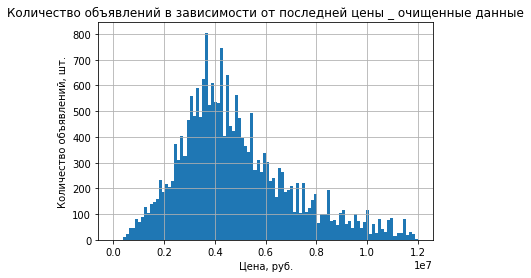

Мода данного распределения =  4500000


In [38]:
hist_plot(
    operating_values(df, 'last_price'),
    'last_price',
    'Количество объявлений в зависимости от последней цены _ очищенные данные',
    'Цена, руб.',
    'Количество объявлений, шт.',
    100,
    (0, 12*10**6)
)

После фильтрации гистограмма стоимости `last_price` стала более похожа на нормальное распределение, как и должно быть. Дешевой недвижимости нет, а дорогая представлена редко. Суть осталась прежней.

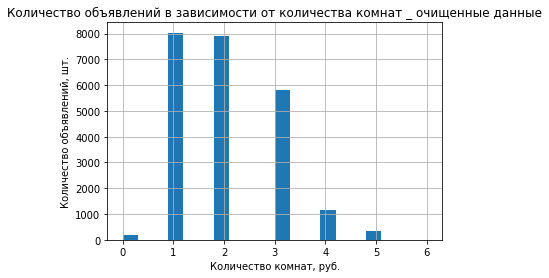

Мода данного распределения =  1


In [39]:
hist_plot(
    operating_values(df, 'rooms_total'),
    'rooms_total',
    'Количество объявлений в зависимости от количества комнат _ очищенные данные',
    'Количество комнат, руб.',
    'Количество объявлений, шт.',
    20,
    (0, 6)
)

Глобально ничего не изменилось. Продают чаще всего 1-ки, 2-шки и трешки. Люди сходятся, рождаются дети и т.д. Многокомнатную недвижимость люди покупают тогда, когда не планируют ее долго продавать, т.к. догадываются, что это неликвид, а плата за "квартиру" будет высокой.

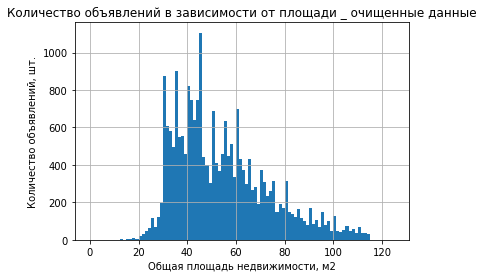

Мода данного распределения =  45.0


In [40]:
hist_plot(
    operating_values(df, 'total_area'),
    'total_area',
    'Количество объявлений в зависимости от площади _ очищенные данные',
    'Общая площадь недвижимости, м2',
    'Количество объявлений, шт.',
    100,
    (0, 125)
)

Пик так и остался на уровне 45 квадратов. Как и ранее от 30 квадратов и до 45 квадратов - самое большое предложение на рынке недвижимости. Первый пик, могут быть общежития или малосемейки.

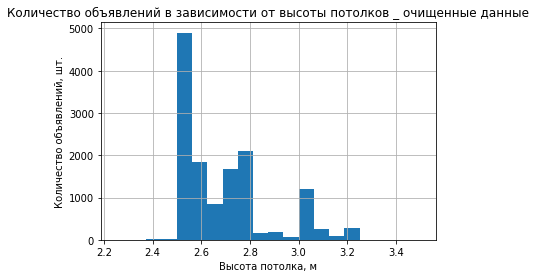

Мода данного распределения =  2.5


In [41]:
hist_plot(
    operating_values(df, 'ceiling_height'),
    'ceiling_height',
    'Количество объявлений в зависимости от высоты потолков _ очищенные данные',
    'Высота потолка, м',
    'Количество объявлений, шт.',
    20,
    (2.25, 3.50)
)


Все стало соответствовать СНИПам и другим нормативам. Отдельно выделяются 3-х метровые потолки, возможно, что это квартиры - "сталинки". Массовые новостройки с такими потолками не строят, да и давно уже не строят.

In [42]:
# Посмотрим еще раз на таблицу и ее колонки
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms_total,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,floor_category,price_for_meter,ratio_living_total_area,ratio_kitchen_total_area,day_of_week,month_of_year,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,2.0,755.0,NaN,другой,120370,0.472222,0.231481,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,первый,82920,0.460396,0.272277,1,12,2018


In [43]:
### Код ревьювера ###

len(df) / 23699

0.9979324022110637

In [44]:
df_cleanest = operating_values(df, 'last_price')
df_cleanest = operating_values(df_cleanest, 'total_area')

In [45]:
len(df_cleanest) / 23699

0.8922317397358538

Потеряли около 10% всех первоначальных данных. Много, но в данных стало значительно меньше выбросов.

Для того, чтобы определить какие факторы больше всего влияют на стоимость квартиры логичнее будет рассмотреть не стоимость недвижимости `last_price`, а цену за кв. метр `price_for_meter`.

In [46]:
df_cleanest.corr().loc['price_for_meter'].sort_values().round(2)

city_centers_nearest       -0.41
ratio_living_total_area    -0.25
rooms_total                -0.23
living_area                -0.17
total_area                 -0.07
airports_nearest           -0.04
ponds_nearest              -0.04
days_exposition            -0.02
day_of_week                -0.01
month_of_year              -0.00
is_apartment                0.01
open_plan                   0.02
balcony_total               0.04
ceiling_height              0.05
studio                      0.05
parks_nearest               0.07
year_exposition             0.07
parks_around_3000           0.10
ponds_around_3000           0.10
total_images                0.12
kitchen_area                0.24
floor                       0.25
ratio_kitchen_total_area    0.31
floors_total                0.34
last_price                  0.65
price_for_meter             1.00
Name: price_for_meter, dtype: float64

Наибольшее влияние оказывают (кроме общей цены):
- площади помещения (в т.ч. кухня) и их соотношения. 
- удаленность от центра и расположение относительно мест отдыха. Интерсный момент, что удаленность до аэропорта не так важна. Думаю, это связано с тем, что тут важнее не абсолютное расстояние, а транспортная развязка, быстрота и удобство.
- этаж и этажность. Не все хотят первый или последний этаж, чаще предпочитают "золотую середину" (у нас это "другой").
- высокие потолки относятся к плюсу квартиры, наверное так. Если завтра введут кварплату с м3, а не м2, то корреляция, думаю, резко изменится. 
- очень важно, что количество изображений тоже положительно влияют на стоимость. Если в квартире есть, что показать, то почему не показать. Цена соответственно будет выше. Если это новостройка, то достаточно бывает просто адреса, остальное можно найти на сайте застройщика. Если квартира требует ремонта, то особо фотографировать там нечего, цена соответственно ниже.
- Дата размещения объявления имеет слабую корреляцию с ценой за метр. Возможно, если бы это был курорт, то там была другая корреляция. В С.-Петербурге недвижимость чаще покупают для круглогодичного проживания.

In [1]:
(df
 .corr()['last_price']
 .to_frame()
 .sort_values('last_price', ascending = False)
 .round(2)
 .style
 .background_gradient(cmap="Greens")
)

NameError: name 'df' is not defined

In [48]:
def boxplot_plot(df, column_x, column_y):
    df.boxplot(column_y, by = column_x),
    plt.show()  
#operating_values(df_cleanest, 'price_for_meter').boxplot('price_for_meter', by = 'floor_category')

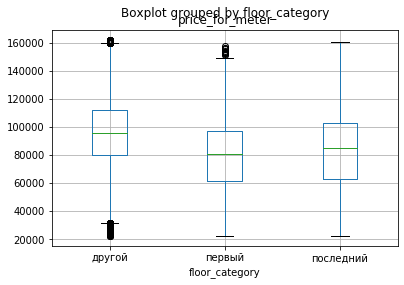

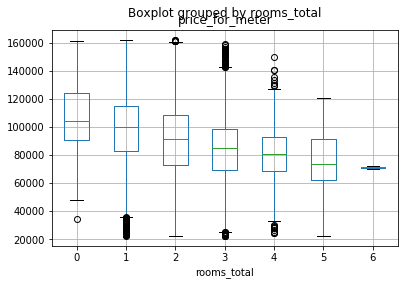

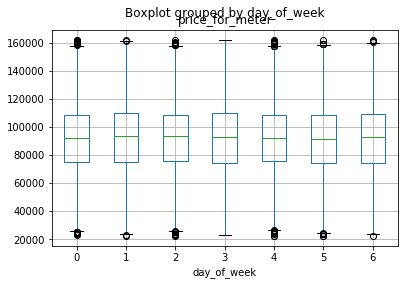

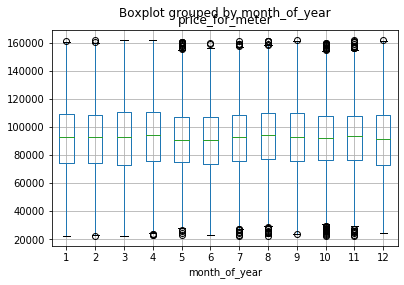

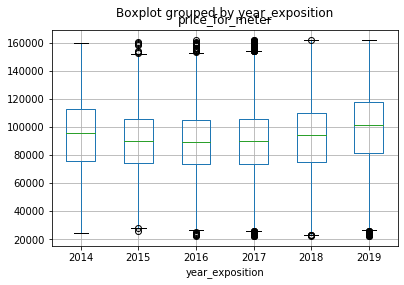

In [49]:
for column in ['floor_category', 'rooms_total', 'day_of_week', 'month_of_year', 'year_exposition']:
    boxplot_plot(
        operating_values(df_cleanest, 'price_for_meter'),
        column,
        'price_for_meter',
    )

 - Цены на первый и последний этажи ниже, что ожидаемо в силу некоторых возможных проблем, что они несут. При этом последний этаж дороже, чем первый, что также ожидаемо.
 - Чем меньше комнат, тем цена за м2 выше. Так и есть, сколько комнат бы ни было, но санузел, кухня и другие нежилые помещения должны быть, что повышает стоимость недвижимости. Отдельно видно, что недвижимость с 0 комнат (это у нас свободная планировка в большей степени) стоит еще дороже. Сводобная планировка - это монолиты или другие более крепкие и элитные строения, где себестоимость такого производства дороже.
 - От времени и месяца размещения объявления цена за м2 практически не зависит.
 - Цена за м2 падала, начиная с 2014 года. Возможно, что кризис повлиял на это. К 2019 году стал спрос восстанавливаться, отчасти из-за стимулирования ипотеки и мат.капитала, понижения ключ. ставки. Что будет дальше на данный момент неизвестно.

Зависимость `price_for_meter` от `['total_area', 'city_centers_nearest']` нагляднее построить через плотность распределения.

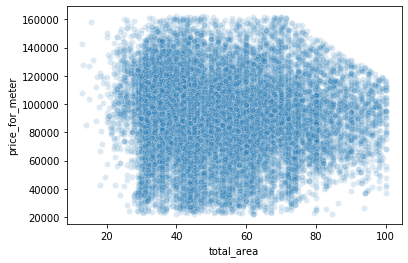

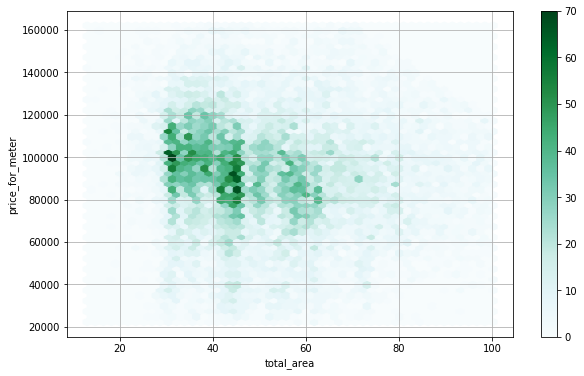

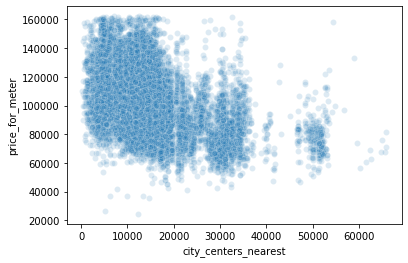

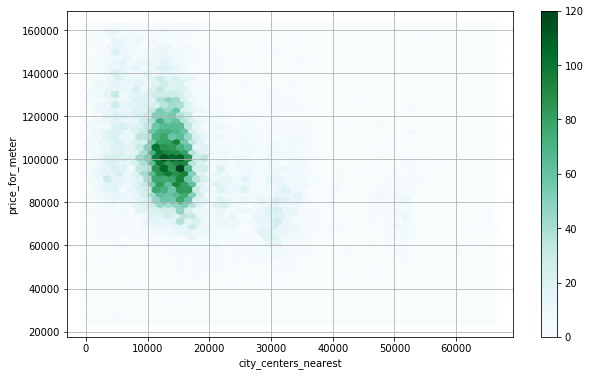

In [50]:
import seaborn as sns
for column in ['total_area', 'city_centers_nearest']:
    sns.scatterplot(
        data = operating_values(df_cleanest, 'price_for_meter'), 
        x = column, 
        y = "price_for_meter", 
        alpha = 0.15
    )
    operating_values(df_cleanest, 'price_for_meter').plot(
        x=column,
        y='price_for_meter',
        kind='hexbin',
        gridsize=50,
        figsize=(10, 6),
        sharex=False,
        grid=True
    ) 
    plt.show()


 - Из графиков заметно, что чаще предложены квартиры с площадью от 30 до 45 квадратов и ценой от 80 до 120 тыс.руб.
 - Больше всего продается квартир на расстоянии от 10 до 18 км от центра и ценой около 90 - 110 тыс. руб. за кв. метр. Возможно, что это заречье и т.д.

#### Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [51]:
top10_locality_name = df_cleanest.groupby('locality_name')['locality_name'].count().sort_values(ascending = False).head(10).index
top10_locality_name

Index(['санкт-петербург', 'поселок мурино', 'поселок шушары', 'всеволожск',
       'пушкин', 'колпино', 'поселок парголово', 'гатчина', 'деревня кудрово',
       'выборг'],
      dtype='object', name='locality_name')

In [52]:
for locality_name in top10_locality_name:
    print(locality_name,":", df.query('locality_name == @locality_name')['price_for_meter'].mean().round())

санкт-петербург : 114849.0
поселок мурино : 85681.0
поселок шушары : 78677.0
всеволожск : 68654.0
пушкин : 103125.0
колпино : 75424.0
поселок парголово : 90175.0
гатчина : 68746.0
деревня кудрово : 92473.0
выборг : 58141.0


Самая дорогая стоимость за квадратный метр в `Санкт-Петербурге - 114849.0`, самая низкая в `Выборге - 58141.0`.

#### Выделим квартиры, расположенные в Санкт-Петербурге, в отдельную таблицу `df_St_P` и добавим столбец `km_to_center` расстояние в км до центра


In [53]:
df_St_P = df_cleanest.loc[df_cleanest['locality_name'] == 'санкт-петербург']
df_St_P.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms_total,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,floor_category,price_for_meter,ratio_living_total_area,ratio_kitchen_total_area,day_of_week,month_of_year,year_exposition
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,другой,92785,0.6125,0.148214,3,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,другой,100000,0.3200,0.410000,1,6,2018


In [54]:
df_St_P['km_to_center'] = (df_St_P['city_centers_nearest'] / 1000).round()
df_St_P['km_to_center'].unique()

array([14.,  8., 12., 15., 11., 10.,  2., 13., 16., 17.,  4., nan,  9.,
        7.,  3.,  6., 21.,  5., 18., 24., 26., 22., 20., 23.,  1., 25.,
       19., 28.,  0., 27., 29.])

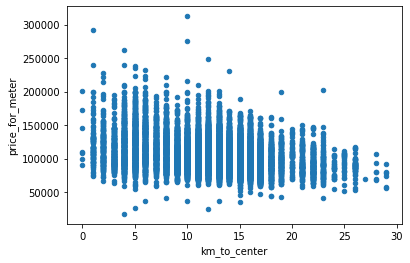

In [55]:
df_St_P.plot(x = 'km_to_center', y = 'price_for_meter', kind = 'scatter')

Text(0, 0.5, 'price_for_meter')

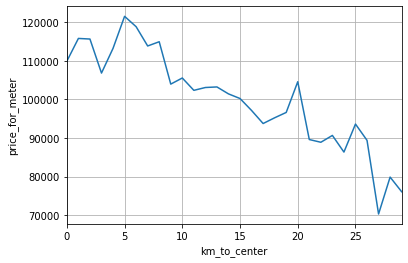

In [56]:
df_St_P.groupby('km_to_center')['price_for_meter'].median().plot(grid=True)
plt.ylabel('price_for_meter')

Из графиков видно, что большая плотность  - это около `9км` до цента.Также есть пики в районе 20 и 22,5 км. Возможно это какая-то застройка "Новый Санкт - Петербург" или другие густонаселенные районы.
Рассмотрим недвижимость, которая попадает в радиус 9 км - это будем считать центром.

In [57]:
df_9km = df_St_P.query('km_to_center <= 9') # недвижимость в центре 
df_9km


,total_images,last_price,total_area,first_day_exposition,rooms_total,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_category,price_for_meter,ratio_living_total_area,ratio_kitchen_total_area,day_of_week,month_of_year,year_exposition,km_to_center
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121.0,другой,100000,0.320000,0.410000,1,6,2018,8.0
24,8,6500000,97.2,2015-10-31,2,NaN,3.0,46.5,1,False,...,124.0,265.0,первый,66872,0.478395,0.201646,5,10,2015,2.0
61,18,7990000,74.0,2017-08-24,2,NaN,4.0,43.0,4,False,...,NaN,609.0,последний,107972,0.581081,0.270270,3,8,2017,4.0
70,9,3400000,30.0,2018-09-05,1,NaN,5.0,16.0,1,False,...,NaN,14.0,первый,113333,0.533333,0.233333,2,9,2018,8.0
85,13,5200000,46.3,2018-11-26,2,3.00,5.0,27.8,5,False,...,682.0,65.0,последний,112311,0.600432,0.172786,0,11,2018,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23668,13,6000000,47.0,2018-03-16,2,3.00,5.0,27.0,4,False,...,NaN,157.0,другой,127659,0.574468,0.191489,4,3,2018,9.0
23674,10,5950000,56.0,2019-03-05,3,NaN,8.0,32.1,3,False,...,303.0,NaN,другой,106250,0.573214,0.151786,1,3,2019,9.0
23681,13,5250000,43.0,2018-05-11,2,2.50,5.0,29.0,2,False,...,660.0,80.0,другой,122093,0.674419,0.139535,4,5,2018,7.0
23690,3,5500000,52.0,2018-07-19,2,NaN,5.0,31.0,2,False,...,NaN,15.0,другой,105769,0.596154,0.115385,3,7,2018,6.0


Таких объектов - 3051 штук.

In [58]:
df_9km[['total_area', 'last_price', 'rooms_total', 'ceiling_height']].describe().round(2)

,total_area,last_price,rooms_total,ceiling_height
count,3051.00,3051.00,3051.00,1937.00
mean,59.48,6804210.33,2.11,2.98
std,18.71,2187458.56,0.89,1.15
min,12.00,1600000.00,0.00,2.40
25%,44.50,5100000.00,1.00,2.70
50%,58.00,6650000.00,2.00,2.90
75%,73.00,8400000.00,3.00,3.10
max,100.20,11894400.00,5.00,32.00


Интересный момент, что в центре Санкт-Петербурга чаще продаются сталинки с 3-метровыми потолками, а также 2 комнатные квартиры. Наверное, раньше именно такие и строили там. Медианная площать 58 км.м., что вполне соответствует двушке. 

Рассмотрим корреляцию для центра Санкт-Петербурга в сравнении с ранее полученной для всего массива данных.

In [59]:
corr_general = df_cleanest.corr().loc['price_for_meter'].sort_values().round(2)
corr_centr_spb= df_9km.corr().loc['price_for_meter'].sort_values().round(2)

In [60]:
for index in corr_general.index:
    print(index, (corr_general[index], corr_centr_spb[index]))

city_centers_nearest (-0.41, -0.11)
ratio_living_total_area (-0.25, -0.35)
rooms_total (-0.23, -0.43)
living_area (-0.17, -0.41)
total_area (-0.07, -0.33)
airports_nearest (-0.04, -0.03)
ponds_nearest (-0.04, 0.01)
days_exposition (-0.02, 0.01)
day_of_week (-0.01, 0.02)
month_of_year (-0.0, -0.03)
is_apartment (0.01, 0.0)
open_plan (0.02, 0.02)
balcony_total (0.04, 0.15)
ceiling_height (0.05, 0.01)
studio (0.05, 0.05)
parks_nearest (0.07, 0.09)
year_exposition (0.07, 0.11)
parks_around_3000 (0.1, 0.0)
ponds_around_3000 (0.1, 0.12)
total_images (0.12, 0.12)
kitchen_area (0.24, 0.16)
floor (0.25, 0.2)
ratio_kitchen_total_area (0.31, 0.41)
floors_total (0.34, 0.24)
last_price (0.65, 0.37)
price_for_meter (1.0, 1.0)


- Для недвижимости в центре Санкт-Петербурга расстояние до центра оказывает меньшее влияние на цену, что очевидно.
- Этажность здания стала влиять несколько меньше, что может быть связано с однотипностью строений в центре.
- Большой спрос на малокомнатные квартиры или свободной планировки, поэтому цена за м2 в центре на такое жилье выше.
- Увеличилась обратная корреляция с общей площадью. Думаю, это также связано, что малокомнатные квартиры имеют повышенный спрос.
- Остальные показатели имеют схожую корреляцию.

In [61]:
df_out_center = df_St_P.query('km_to_center > 9') # недвижимость, продающаяся на окраине.
df_out_center

,total_images,last_price,total_area,first_day_exposition,rooms_total,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_category,price_for_meter,ratio_living_total_area,ratio_kitchen_total_area,day_of_week,month_of_year,year_exposition,km_to_center
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,574.0,558.0,другой,92785,0.612500,0.148214,3,8,2015,14.0
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,NaN,другой,110544,NaN,0.263966,3,4,2019,12.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,289.0,другой,88524,0.714754,0.106557,6,2,2017,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.3,3,False,...,553.0,137.0,другой,127525,0.512626,0.214646,3,11,2017,14.0
15,16,4650000,39.00,2017-11-18,1,NaN,14.0,20.5,5,False,...,296.0,19.0,другой,119230,0.525641,0.194872,5,11,2017,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23680,14,5000000,59.00,2019-04-04,3,2.50,5.0,52.0,1,False,...,NaN,NaN,первый,84745,0.881356,0.118644,3,4,2019,12.0
23686,8,3300000,31.00,2017-04-29,1,2.55,9.0,18.0,6,False,...,317.0,193.0,другой,106451,0.580645,0.209677,5,4,2017,12.0
23687,6,3200000,39.00,2017-12-16,1,NaN,9.0,20.0,6,False,...,NaN,38.0,другой,82051,0.512821,0.282051,5,12,2017,17.0
23689,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,...,652.0,29.0,другой,100566,0.461756,0.257790,2,2,2018,16.0


Сравним основные гистограммы для центра и окраины.

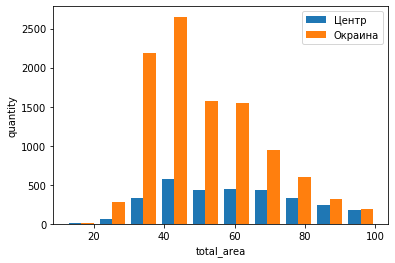

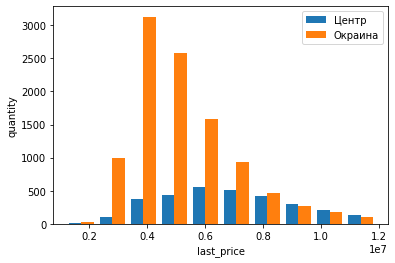

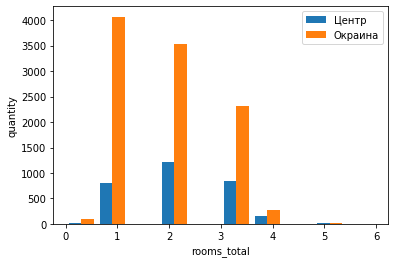

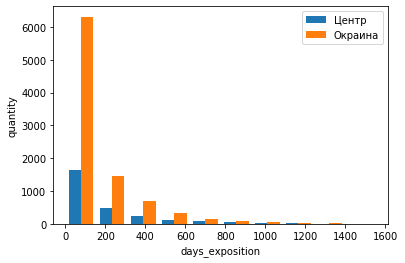

In [62]:
for column in ['total_area', 'last_price', 'rooms_total', 'days_exposition']:
    plt.hist([df_9km[column], df_out_center[column]], bins = 10, label=['Центр', 'Окраина'])
    plt.xlabel(column)
    plt.ylabel('quantity')
    plt.legend(loc='upper right')
    plt.show()

- В целом поведение графиков схожее.
- Однако видно, что в центре продаются чаще двухкомнатные квартиры. Думаю, что их там просто больше, т.к. строили сталинки и однушек там практически не было. Также квартиры выделялись только тем служащим, у которых была семья, поэтому однушек в историческом центре меньше (их просто не строили).
- Немного разное распределение по `last_price`. В центре пик приходится на 6 млн. против 4 млн. на окраине.

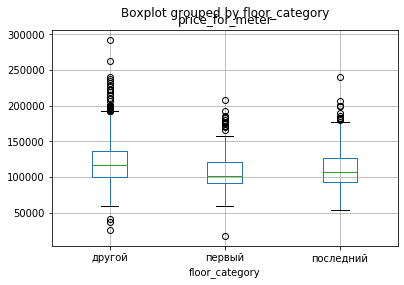

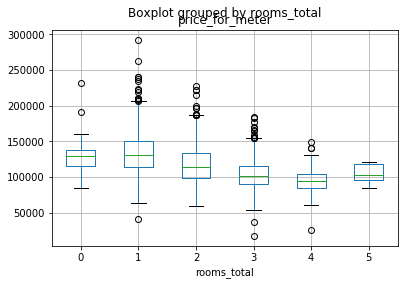

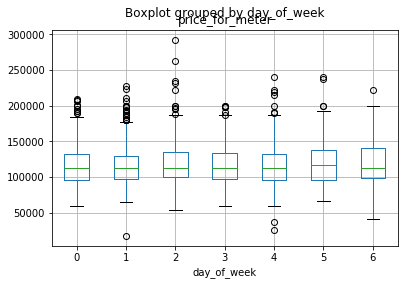

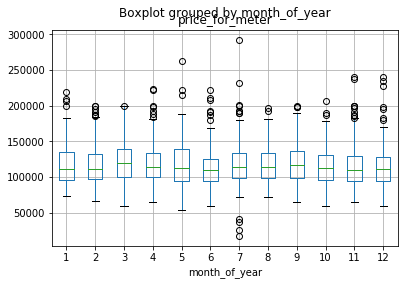

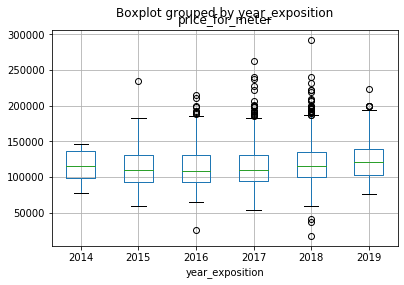

In [63]:
for column in ['floor_category', 'rooms_total', 'day_of_week', 'month_of_year', 'year_exposition']:
    boxplot_plot(
        df_9km,
        column,
        'price_for_meter',
    )

 - Цены на первый и последний этажи в центре также ниже. С учётом старости дома проблем с первыми и последними этажами может быть еще и больше, чем в новостройке на окраине.
 - Чем меньше комнат, тем цена за м2 выше. Однако в 5-комнатных квартирах цена за м2 выше, возможно это какие-то элитные дома. Это то, что отличает центральную часть от окраины.
 - От времени и месяца размещения объявления цена за м2 практически не зависит.
 - Цена за м2 падала, начиная с 2014 года. К 2019 году стал спрос восстанавливаться. Все также, как и в основном датасете.

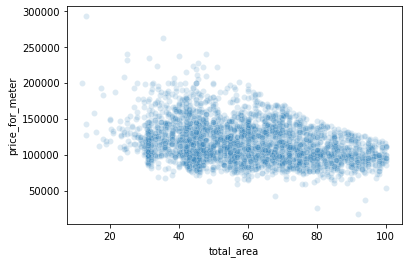

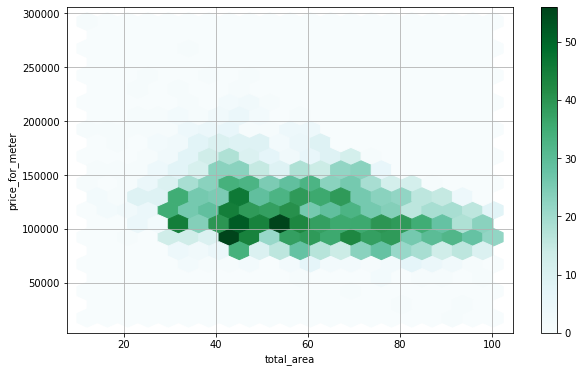

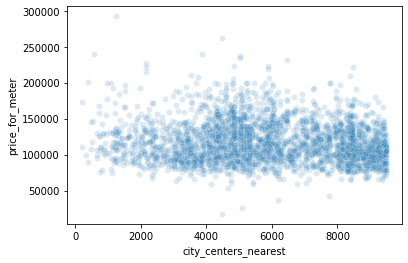

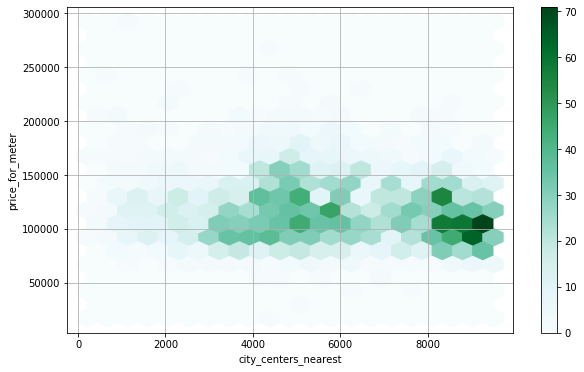

In [64]:
import seaborn as sns
for column in ['total_area', 'city_centers_nearest']:
    sns.scatterplot(
        data = df_9km, 
        x = column, 
        y = "price_for_meter", 
        alpha = 0.15
    )
    df_9km.plot(
        x=column,
        y='price_for_meter',
        kind='hexbin',
        gridsize=20,
        figsize=(10, 6),
        sharex=False,
        grid=True
     )
    plt.show()


- В центре чаще представлены квартиры в районе 100 тыс. за м2 и площадью 40 - 60 м2.
- По приближению к окраине количество продаваемых квартир увеличивается. Предполагаю, что центр в основном состоит из малоэтажек, поэтому и квартир продается меньше. В диапазоне 6 - 8 км от центра наблюдается провал. Есть предположение, что  с какой-то стороны от центра мы попадаем в воду, где зданий нет.

### Шаг 5. Общий вывод

- На стоимость недвижимости наибольшее влияние оказывают: общая площать недвижимости, жилая площать, размер кухни.
- Для недвижимости, расположенной за центром Санкт-Петербурга, параметр `расстояние до центра` также оказывает влияние (чем ближе, тем дороже).
- Расположение поблизости парков отдыха и водоемов увеличивают цену недвижимости.
- Дата размещения практически никак не влияет на цену недвижимости (применительно к представленным данным).
- Первые и последние этажи стоят дешевле, при этом последний дороже первого.
- Наиболее часто продаваемые объекты - это 1-ные или 2-комнатные квартиры в районе 4.5 млн. рублей.
- Высокие потолки расцениваются, как достоинство, поэтому цена на такую недвижимость выше.